In [3]:
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
model= ChatGroq(
model="llama-3.3-70b-versatile",
temperature=0.5
)


In [6]:
class GraphState(TypedDict):
    message:str
    reply:str

def stream(state: GraphState):
    message=state["message"]
    reply=model.invoke(message)
    return {"reply":reply}


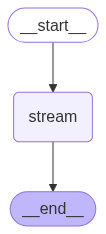

In [7]:
graph=StateGraph(GraphState)
graph.add_node("stream",stream)

graph.add_edge(START,"stream")
graph.add_edge("stream",END)

workflow=graph.compile()
workflow

In [8]:
workflow.stream({"message":"Write a poem about a lonely computer."},stream_mode="messages")

<generator object Pregel.stream at 0x0000028B3E172700>

In [16]:
for data,metadata in workflow.stream({"message":"Write a 2 line poem about a lonely computer."},stream_mode="messages"):
    print(data.content,end="",flush=True)

In silence, the computer sits and waits, its screen a dim and lonely fate. Its circuits hum with idle pain, a machine without a user's gentle touch again.